## Loan Prediction

### problem statement
##### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

importing various libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing altair for better visualisation
import altair as alt

In [4]:
#this statement is needed for running altair in the notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
#reading the data through pandas library
data=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [6]:
#showing the first five rows of the dataframe
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.shape

(614, 13)

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
data.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

>total no of rows=614 but many columns don't have that much values which means that there are many NaN values which needs to be fixed

In [11]:
data.groupby('Education').count()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Education,,,,,,,,,,,,
Graduate,480,468,477,469,454,480,480,465,472,443,480,480
Not Graduate,134,133,134,130,128,134,134,127,128,121,134,134


#### let's do some visualisation to get insights about the data

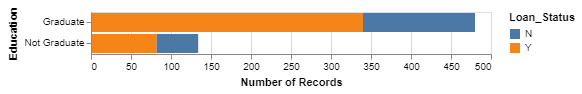

In [12]:
alt.Chart(data).mark_bar().encode(
y='Education',
x='count()' ,
color='Loan_Status'   
)

>the above plot shows that there are only two category graduate and not_graduate and also that how distribution of loan_approval to graduate and not_graduate section.

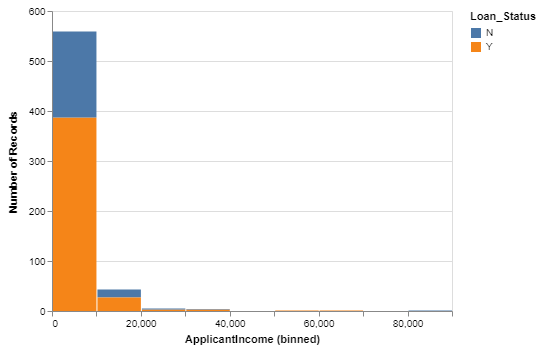

In [13]:
alt.Chart(data).mark_bar().encode(
x=alt.X('ApplicantIncome',bin=True),
y='count()',
color='Loan_Status'    
).interactive()

the above plot shows that most of the loan applicant lies in the range of below 10000 income. 

In [14]:
k=data.loc[(data.ApplicantIncome<=10000),:]
l=data.loc[(data.ApplicantIncome>10000),:]

In [15]:
k.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
applicants=k.shape
applicants

(562, 13)

out of 614 applicant 562 applicants have income less than 10000 which is quite obvious.

In [17]:
loan_approved=k.loc[(data.Loan_Status=='Y'),:].shape
loan_approved

(387, 13)

In [18]:
percentage=(387/562)*100
percentage

68.86120996441281

about 69% applicants in the income range 10000 have their loan approved

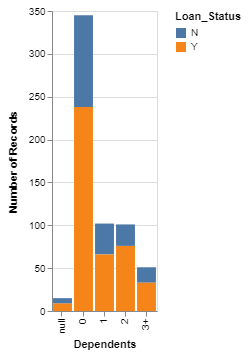

In [19]:
alt.Chart(data).mark_bar().encode(
x='Dependents',
y='count()',
color='Loan_Status'    
)

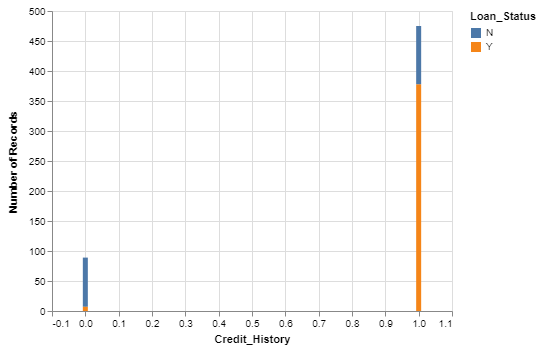

In [20]:
alt.Chart(data).mark_bar().encode(
x='Credit_History',
y='count()',
color='Loan_Status'    
)

the above plot shows that applicants having credit_history as 1 are more likely to get loan approval on the other hand applicants having credit_history as 0 are less likely to get the loan approval.
thus credit_history seems to be an important feature in deciding wheather or not an applicant loan_application can be approved or not

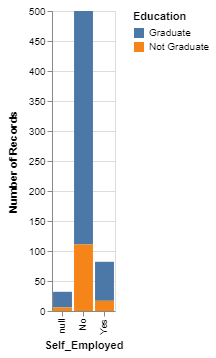

In [21]:
alt.Chart(data).mark_bar().encode(
x='Self_Employed',
y='count()',
color='Education'    
)

maximum number of loan_applicants are unemployed graduates

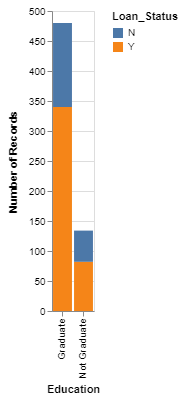

In [22]:
alt.Chart(data).mark_bar().encode(
x='Education',
y='count()',
color='Loan_Status'    
)

In [23]:
gradu_applied=data.loc[(data.Education=='Graduate'),:].shape
gradu_approved=data.loc[(data.Education=='Graduate') & (data.Loan_Status=='Y'),:].shape
print(gradu_approved)
print(gradu_applied)

(340, 13)
(480, 13)


In [24]:
percent_graduate_approved=(340/480)*100
percent_graduate_approved

70.83333333333334

thus approx 71% of the graduates have their loan_approved

In [25]:
nongradu_applied=data.loc[(data.Education=='Not Graduate'),:].shape
nongradu_approved=data.loc[(data.Education=='Not Graduate') & (data.Loan_Status=='Y'),:].shape
print(nongradu_approved)
print(nongradu_applied)

(82, 13)
(134, 13)


In [26]:
percent_nongraduate_approved=(82/134)*100
percent_nongraduate_approved

61.19402985074627

however only 61% of the non_graduates have their loan_approved

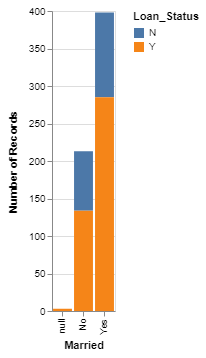

In [27]:
alt.Chart(data).mark_bar().encode(
x='Married',
y='count()',
color='Loan_Status'    
)

In [28]:
print(data.loc[(data.Education=='Graduate') & (data.Credit_History==1),:].shape)
print(data.loc[(data.Education=='Graduate') & (data.Credit_History==1) & (data.Loan_Status=='Y'),:].shape)

(380, 13)
(307, 13)


In [29]:
percent=(307/380)*100
percent

80.78947368421052

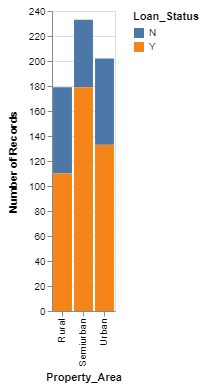

In [30]:
alt.Chart(data).mark_bar().encode(
x='Property_Area',
y='count()',
color='Loan_Status'    
)

In [31]:
notgradu_Urban_applied=data.loc[(data.Education=='Not Graduate') & (data.Property_Area=='Urban'),:].shape
notgradu_urban_approved=data.loc[(data.Education=='Not Graduate') & (data.Loan_Status=='Y') & (data.Property_Area=='Urban'),:].shape
print(notgradu_Urban_applied)
print(notgradu_urban_approved)

(40, 13)
(21, 13)


In [32]:
21/40*100

52.5

only 52.5% of the applicant who are not graduate and belong to urban area are likely to get loan approval

In [33]:
gradu_Urban_applied=data.loc[(data.Education=='Graduate') & (data.Property_Area=='Urban'),:].shape
gradu_urban_approved=data.loc[(data.Education=='Graduate') & (data.Loan_Status=='Y') & (data.Property_Area=='Urban'),:].shape
print(gradu_Urban_applied)
print(gradu_urban_approved)

(162, 13)
(112, 13)


In [34]:
(112/162)*100

69.1358024691358

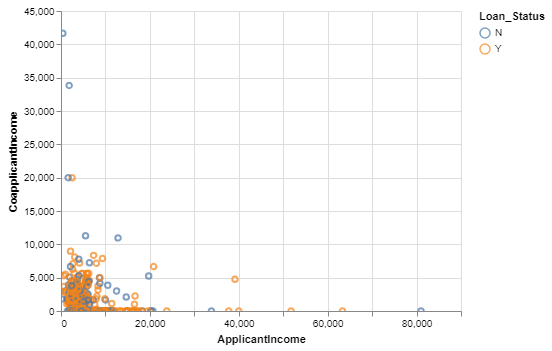

In [134]:
alt.Chart(data).mark_point().encode(
x='ApplicantIncome',
y='CoapplicantIncome',
color='Loan_Status',
tooltip='Loan_ID'   
).interactive()

whereas graduates from urban area are more likely to get loan approval

In [36]:
#the non_numeric column like education property_area and loan_status needs to be converted into numeric column 
#and we will also have to deal with pandas NaN quqntity
pd.get_dummies(data['Education'],prefix='Educated').head()

,Educated_Graduate,Educated_Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [37]:
pd.get_dummies(data.Property_Area,prefix='Property_Area').head()

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
pd.get_dummies(data.Loan_Status,prefix='Loan_Status').head()

,Loan_Status_N,Loan_Status_Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [39]:
new_data=pd.concat([data,pd.get_dummies(data['Education'],prefix='Educated'),
                  pd.get_dummies(data.Property_Area,prefix='Property_Area'),
                  pd.get_dummies(data.Loan_Status,prefix='Loan_Status'),
                   pd.get_dummies(data.Self_Employed,prefix='Self_Employed'),
                   pd.get_dummies(data.Married,prefix='Married'),
                   pd.get_dummies(data.Gender,prefix='Gender')],axis=1)

In [40]:
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Gender_Female,Gender_Male
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,0,1,0,1,1,0,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,0,0,1,0,1,0,0,1,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,0,1,0,1,0,1,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,0,1,0,1,1,0,0,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,0,1,0,1,1,0,1,0,0,1


In [41]:
df=new_data.drop(['Gender','Married','Education','Self_Employed','Loan_Status','Property_Area'],axis=1)

In [42]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Educated_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Gender_Female,Gender_Male
0,LP001002,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,1,0,1,0,0,1,0,1
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,0,0,1,0,1,0,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,1,0,0,1,0,1,1,0,0,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0,0,1


>now we have only numeric columns but still there are some columns which do not add new information to the data frame such as 
gender_male and gender_female both are exactly the same thus we should also drop such columns which will result in less computation.

In [43]:
#dropping redundent columns.
df=df.drop(['Loan_Status_N','Self_Employed_No','Married_No','Gender_Female','Educated_Not Graduate'],axis=1)

In [44]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Self_Employed_Yes,Married_Yes,Gender_Male
0,LP001002,0,5849,0.0,NaN,360.0,1.0,1,0,0,1,1,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,1
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,1,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,0,0,1,1,0,1,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,1


>our new dataframe is ready but we still have to handle NaN value

In [45]:
#dropping the rows if it contains any NaN value.
temp=df.dropna(how='any',axis=0)

In [46]:
temp.shape

(517, 15)

In [47]:
data.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

>By dropping the rows having any NaN values we lost almost 100 rows ,due to this we might lose valuable information ,thus we should replace NaN with some logical value

In [48]:
temp.dtypes

Loan_ID                     object
Dependents                  object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Educated_Graduate            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_Y                uint8
Self_Employed_Yes            uint8
Married_Yes                  uint8
Gender_Male                  uint8
dtype: object

In [49]:
df=temp

In [50]:
df.head(10)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Self_Employed_Yes,Married_Yes,Gender_Male
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,1
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,1,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,0,0,1,1,0,1,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,1,0,0,1,1,1,1,1
6,LP001013,0,2333,1516.0,95.0,360.0,1.0,0,0,0,1,1,0,1,1
7,LP001014,3+,3036,2504.0,158.0,360.0,0.0,1,0,1,0,0,0,1,1
8,LP001018,2,4006,1526.0,168.0,360.0,1.0,1,0,0,1,1,0,1,1
9,LP001020,1,12841,10968.0,349.0,360.0,1.0,1,0,1,0,0,0,1,1
10,LP001024,2,3200,700.0,70.0,360.0,1.0,1,0,0,1,1,0,1,1


In [51]:
df['Dependents']=df.Dependents.str.replace('+','').astype(float)

In [52]:
df.head(10)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Self_Employed_Yes,Married_Yes,Gender_Male
1,LP001003,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,1
2,LP001005,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,1,1,1
3,LP001006,0.0,2583,2358.0,120.0,360.0,1.0,0,0,0,1,1,0,1,1
4,LP001008,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,1
5,LP001011,2.0,5417,4196.0,267.0,360.0,1.0,1,0,0,1,1,1,1,1
6,LP001013,0.0,2333,1516.0,95.0,360.0,1.0,0,0,0,1,1,0,1,1
7,LP001014,3.0,3036,2504.0,158.0,360.0,0.0,1,0,1,0,0,0,1,1
8,LP001018,2.0,4006,1526.0,168.0,360.0,1.0,1,0,0,1,1,0,1,1
9,LP001020,1.0,12841,10968.0,349.0,360.0,1.0,1,0,1,0,0,0,1,1
10,LP001024,2.0,3200,700.0,70.0,360.0,1.0,1,0,0,1,1,0,1,1


In [53]:
df.shape

(517, 15)

In [54]:
X_new=df.loc[0:500,:]

In [55]:
X_new.shape

(420, 15)

In [56]:
y_new=df.loc[500:614,:]

In [57]:
y_new.shape

(98, 15)

In [147]:
final_test_feature=y_new.loc[:,['Loan_ID','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Educated_Graduate','Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban','Self_Employed_Yes','Married_Yes','Gender_Male']]

In [148]:
final_test_feature.shape

(98, 14)

In [149]:
final_test_response=y_new.loc[:,'Loan_Status_Y']

In [150]:
final_test_response.shape

(98,)

In [159]:
final_test_feature.drop('Loan_ID',axis=1)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Married_Yes,Gender_Male
500,0.0,645,3683.0,113.0,480.0,1.0,1,1,0,0,0,0,0
501,0.0,3159,0.0,100.0,360.0,1.0,1,0,1,0,0,0,0
502,2.0,4865,5624.0,208.0,360.0,1.0,1,0,1,0,0,1,1
504,0.0,3814,1483.0,124.0,300.0,1.0,0,0,1,0,0,1,1
505,2.0,3510,4416.0,243.0,360.0,1.0,1,1,0,0,0,1,1
507,0.0,3583,0.0,96.0,360.0,1.0,1,0,0,1,0,0,0
508,0.0,2479,3013.0,188.0,360.0,1.0,1,0,0,1,1,1,1
509,1.0,13262,0.0,40.0,360.0,1.0,1,0,0,1,0,0,0
510,0.0,3598,1287.0,100.0,360.0,1.0,0,1,0,0,0,0,1
511,1.0,6065,2004.0,250.0,360.0,1.0,1,0,1,0,0,1,1


In [58]:
X=X_new.loc[:,['Loan_ID','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Educated_Graduate','Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban','Self_Employed_Yes','Married_Yes','Gender_Male']]

In [59]:
X.shape

(420, 14)

In [60]:
X.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Married_Yes,Gender_Male
1,LP001003,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,1,1
2,LP001005,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,1,1
3,LP001006,0.0,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,1,1
4,LP001008,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,0,1
5,LP001011,2.0,5417,4196.0,267.0,360.0,1.0,1,0,0,1,1,1,1


In [61]:
X_new.dtypes

Loan_ID                     object
Dependents                 float64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Educated_Graduate            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_Y                uint8
Self_Employed_Yes            uint8
Married_Yes                  uint8
Gender_Male                  uint8
dtype: object

In [62]:
y=X_new.loc[:,'Loan_Status_Y']

In [63]:
y.shape

(420,)

In [64]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status_Y, dtype: uint8

In [65]:
X.drop('Loan_ID',axis=1,inplace=True)

In [66]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Married_Yes,Gender_Male
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,1,1
2,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,1,1
3,0.0,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,1,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,0,1
5,2.0,5417,4196.0,267.0,360.0,1.0,1,0,0,1,1,1,1


In [67]:
from sklearn.cross_validation import train_test_split

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(336, 13)
(84, 13)
(336,)
(84,)


we will keep this X_test and y_test as hold out set to test the accuracy of the model once we are done through all the process

In [70]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [71]:
null_accuracy=422/614*100
null_accuracy

68.72964169381108

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
L=list(range(1,31))
a=[]
for i in L:
     knn=KNeighborsClassifier(n_neighbors=i)
     scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy') 
     a.append(scores.mean())
print(a)
print(max(a))

[0.6, 0.5428571428571429, 0.6238095238095238, 0.5880952380952381, 0.6404761904761905, 0.6214285714285714, 0.6476190476190476, 0.6261904761904761, 0.669047619047619, 0.6476190476190476, 0.669047619047619, 0.6523809523809523, 0.6785714285714286, 0.6690476190476191, 0.6714285714285715, 0.6761904761904762, 0.6761904761904762, 0.6642857142857144, 0.680952380952381, 0.6690476190476191, 0.6904761904761905, 0.6833333333333333, 0.6928571428571428, 0.6857142857142857, 0.6880952380952381, 0.6833333333333333, 0.6857142857142857, 0.6857142857142857, 0.6904761904761905, 0.6904761904761905]
0.6928571428571428


    the accuracy score we got by using Kneighborsclassifier is approx same as null accuracy .therefore this model doesnot seems to be a good model for this data

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
clf=LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
y_pred_class=clf.predict(X_test)

In [77]:
print(y_pred_class)
print(y_test.values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0]
[1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 1 1 0 1 0 0 0]


>by printing the true values and predicted values we can see that our model is doing only a certain type of error i.e it is failing more often in predicting 0 than 1.model_evaluation method such as accuracy_score does not give such type of insight as which type of error our model is doing.
for this we can print **confusion_metrics**

In [78]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8214285714285714


In [79]:
print(metrics.confusion_matrix(y_test,y_pred_class))

[[11 14]
 [ 1 58]]


from confusion metrics we got:
- **TRUE POSITIVE(TP)** =58 i.e we correctly predicted that the loan_status is Y

- **TRUE NEGATIVES(TP)** =11 i.e we correctly predicted that the loan_status is N

- **FALSE POSITIVE(FP)** =14 i.e we incorrectly predicted that the loan_status is Y

- **FALSE NEGATIVES(FN)** =1 i.e we incorrectly predicted that the loan_status is N

we now define :
- **CLASSIFICATION ACCURACY**:- Overall, how often is the classifier correct?

- **SENSITIVITY**:- When the actual value is positive, how often is the prediction correct?

- **SPECIFICITY**:- When the actual value is negative, how often is the prediction correct?

- **FALSE POSITIVE RATE**:- When the actual value is negative, how often is the prediction incorrect?

- **PRECISION**:- When a positive value is predicted, how often is the prediction correct? OR How "precise" is the classifier when predicting positive instances?

In [80]:
TP=58
TN=11
FP=14
FN=1

In [81]:
#classification accuracy
print((TP+TN)/(TP+TN+FP+FN))

0.8214285714285714


we can see that the classification_accuracy metrics can also be calculated by confusion metrics along with many other metrics which are specified above

In [82]:
#sensitivity
print((TP)/(TP+FN))

0.9830508474576272


In [83]:
#specificity
print((TN)/(TN+FP))

0.44


thus we can see that our logistic_regression model has quite high sensitivity and very low specificity means it is making error in predicting negetive when the actual value is negetive 

In [84]:
print(metrics.precision_score(y_test,y_pred_class))

0.8055555555555556


In [85]:
print(y_pred_class)
print(y_test.values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0]
[1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 1 1 0 1 0 0 0]


In [86]:
clf.predict_proba(X_test)[0:30,:]

array([[0.26384104, 0.73615896],
       [0.24505702, 0.75494298],
       [0.21781449, 0.78218551],
       [0.30103648, 0.69896352],
       [0.31639838, 0.68360162],
       [0.16269142, 0.83730858],
       [0.36707488, 0.63292512],
       [0.28092711, 0.71907289],
       [0.17072289, 0.82927711],
       [0.33695264, 0.66304736],
       [0.16554779, 0.83445221],
       [0.17915291, 0.82084709],
       [0.19727171, 0.80272829],
       [0.28454452, 0.71545548],
       [0.30833454, 0.69166546],
       [0.34199526, 0.65800474],
       [0.18407875, 0.81592125],
       [0.16735505, 0.83264495],
       [0.29971675, 0.70028325],
       [0.12352354, 0.87647646],
       [0.09408269, 0.90591731],
       [0.27380303, 0.72619697],
       [0.26692964, 0.73307036],
       [0.3028174 , 0.6971826 ],
       [0.78066919, 0.21933081],
       [0.24397073, 0.75602927],
       [0.36749492, 0.63250508],
       [0.9269042 , 0.0730958 ],
       [0.87311742, 0.12688258],
       [0.17090048, 0.82909952]])

In [87]:
y_prd=clf.predict_proba(X_test)[:,1]

In [88]:
y_prd=pd.DataFrame(y_prd)
y_prd.head()

,0
0,0.736159
1,0.754943
2,0.782186
3,0.698964
4,0.683602


In [89]:
y_prd.columns=['probabilities']

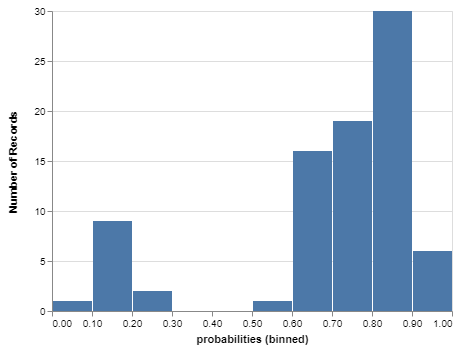

In [90]:
alt.Chart(y_prd).mark_bar().encode(
x=alt.X('probabilities',bin=True),
y='count()'    
)

After plotting the probabilities obtained from logistic_regression we can see that our model rearly predicts zero because the number of probabilities less than 0.5  is very less.

### Now lets lower the threshold of logistic_regression from 0.5 to 0.2 and lets see how our model performs

In [91]:
y_prd_prob=clf.predict_proba(X_test)[:,1]

In [92]:
from sklearn.preprocessing import binarize
y_pred_class2=binarize([y_prd_prob],0.6)[0]

In [93]:
y_pred_class2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.])

In [94]:
print(metrics.confusion_matrix(y_test,y_pred_class))
print(metrics.confusion_matrix(y_test,y_pred_class2))

[[11 14]
 [ 1 58]]
[[12 13]
 [ 1 58]]


>thus we can change the sensitivity or specificity by adjusting the classification threshold

In [95]:
new_accuracy_score=(12+58)/(12+58+1+13)
new_accuracy_score

0.8333333333333334

By adjusting the classification threshold to 0.6 we got accuracy_score of approx 83% which is 1% more than what we got previously

In [96]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_prd_prob)

Text(0.5,1,'roc_curve')

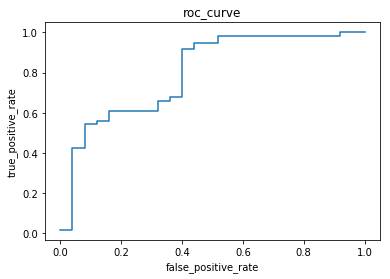

In [97]:
plt.plot(fpr,tpr)
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('roc_curve')

In [106]:
print(metrics.roc_auc_score(y_test,y_prd_prob))

0.7986440677966101


now let's tune the hyperperameter of logistic_regression and see wheather we can improve the accuracy of the classifier. 

In [98]:
from sklearn.model_selection import GridSearchCV

In [118]:
c_range=list(range(1,20))
print(c_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [119]:
param_grid=dict(C=c_range)
param_grid

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [120]:
grid=GridSearchCV(clf,param_grid,cv=10,scoring='roc_auc',return_train_score=True)

In [121]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [122]:
cv_results_df=pd.DataFrame(grid.cv_results_)

In [123]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007199,0.001723,0.001601,6.690416e-04,1,{'C': 1},0.750663,0.880637,0.740053,0.742706,...,0.815077,0.819629,0.825785,0.816387,0.811442,0.814618,0.803976,0.810721,0.813138,0.006464
1,0.005698,0.000900,0.001298,6.401767e-04,2,{'C': 2},0.750663,0.880637,0.737401,0.745358,...,0.813996,0.819956,0.826931,0.816550,0.811147,0.814487,0.804041,0.810885,0.813230,0.006676
2,0.005198,0.000603,0.001201,3.997929e-04,3,{'C': 3},0.750663,0.875332,0.734748,0.745358,...,0.813767,0.819956,0.827193,0.816812,0.811147,0.814193,0.805809,0.810623,0.813584,0.006237
3,0.005198,0.000597,0.001000,5.135693e-07,4,{'C': 4},0.750663,0.875332,0.734748,0.745358,...,0.813963,0.820022,0.823689,0.816616,0.811180,0.815928,0.806202,0.810427,0.813358,0.005588
4,0.004998,0.000447,0.001200,3.959793e-04,5,{'C': 5},0.753316,0.875332,0.734748,0.745358,...,0.813931,0.820120,0.827030,0.816583,0.810918,0.814455,0.805940,0.810590,0.813508,0.006277
5,0.005200,0.000395,0.001000,9.643435e-07,6,{'C': 6},0.753316,0.875332,0.734748,0.745358,...,0.814029,0.820087,0.822772,0.816780,0.810754,0.814487,0.805056,0.810689,0.813030,0.005546
6,0.005496,0.000807,0.001200,4.000546e-04,7,{'C': 7},0.753316,0.875332,0.734748,0.740053,...,0.814062,0.821004,0.822674,0.816616,0.810820,0.814225,0.808462,0.810754,0.813449,0.005226
7,0.005196,0.000597,0.001000,1.784161e-06,8,{'C': 8},0.753316,0.875332,0.734748,0.740053,...,0.814094,0.820873,0.822543,0.816616,0.810820,0.814291,0.806104,0.810820,0.813164,0.005467
8,0.005299,0.000458,0.001101,2.999387e-04,9,{'C': 9},0.753316,0.875332,0.734748,0.740053,...,0.814062,0.820709,0.825261,0.816419,0.810721,0.814258,0.805973,0.810852,0.813380,0.005952
9,0.005298,0.000458,0.001000,6.760333e-07,10,{'C': 10},0.750663,0.875332,0.734748,0.740053,...,0.814029,0.820808,0.825228,0.816354,0.810623,0.814324,0.805220,0.810885,0.813305,0.006054


In [130]:
cv_results_df['param_C']=cv_results_df.param_C.astype(int)
cv_results_df['mean_train_score']=cv_results_df.mean_train_score.astype(float)

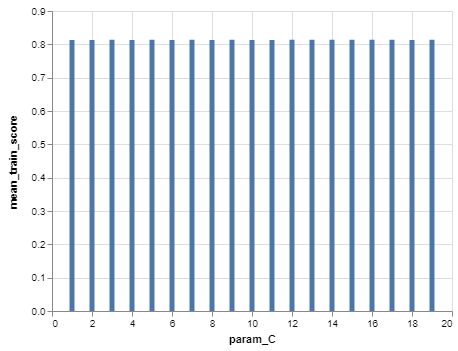

In [135]:
alt.Chart(cv_results_df).mark_bar().encode(
x='param_C',
y='mean_train_score'    
).interactive()

All the accuracy score seems to be exectly the same but lets select the best value of C .

In [136]:
grid.best_estimator_

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
grid.best_score_

0.7758620689655173

In [141]:
from sklearn.model_selection import cross_val_score

In [143]:
new_clf=LogisticRegression(C=2)

In [144]:
scores=cross_val_score(new_clf,X,y,cv=10)

In [146]:
scores.mean()

0.8023809523809524

In [160]:
new_clf.fit(X,y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
final_test_feature.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Married_Yes,Gender_Male
500,0.0,645,3683.0,113.0,480.0,1.0,1,1,0,0,0,0,0
501,0.0,3159,0.0,100.0,360.0,1.0,1,0,1,0,0,0,0
502,2.0,4865,5624.0,208.0,360.0,1.0,1,0,1,0,0,1,1
504,0.0,3814,1483.0,124.0,300.0,1.0,0,0,1,0,0,1,1
505,2.0,3510,4416.0,243.0,360.0,1.0,1,1,0,0,0,1,1


In [168]:
final_pred_class=new_clf.predict(final_test_feature)

In [170]:
print(final_pred_class)
print(final_test_response.values)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1
 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [171]:
print(metrics.accuracy_score(final_test_response,final_pred_class))

0.8163265306122449


Thus we can infer that we are getting aaprox 82% accuracy by using logistic_regresson with C=2.
Now let's try other machine learning models and see wheather we can improve our accuracy score

### let's try random_forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
rf=RandomForestClassifier(n_estimators=10,max_depth=6)

In [244]:
scores=cross_val_score(rf,X,y,cv=10)

In [245]:
scores

array([0.80952381, 0.85714286, 0.76190476, 0.78571429, 0.71428571,
       0.80952381, 0.76190476, 0.83333333, 0.85714286, 0.83333333])

In [246]:
scores.mean()

0.8023809523809524

We are getting an accuracy score of approx 81% using the hyperperameter n_estimator =20.
let's use grid search cv to find the best value of n_estimator and max_depth

In [265]:
RF=RandomForestClassifier(n_estimators=20)

In [266]:
#n_estimator_list=list(range(1,30))
max_depth_list=list(range(1,7))

In [267]:
param_grid=dict(max_depth=max_depth_list)

In [268]:
param_grid.values()

dict_values([[1, 2, 3, 4, 5, 6]])

In [269]:
grid=GridSearchCV(RF,param_grid,cv=5,scoring='roc_auc',return_train_score=True)

In [270]:
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [271]:
rf_results_df=pd.DataFrame(grid.cv_results_)

In [272]:
rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041786,0.007597,0.003198,3.998045e-04,1,{'max_depth': 1},0.784814,0.695955,0.709881,0.739390,...,0.753515,0.051876,6,0.811982,0.833326,0.814676,0.799092,0.805496,0.812914,0.011547
1,0.035987,0.003522,0.003401,4.864785e-04,2,{'max_depth': 2},0.816976,0.752984,0.686008,0.789125,...,0.766910,0.045271,3,0.842590,0.845325,0.868928,0.844310,0.837347,0.847700,0.010964
2,0.039585,0.004126,0.003798,1.163636e-03,3,{'max_depth': 3},0.779509,0.755968,0.665782,0.809682,...,0.766777,0.055632,4,0.851728,0.860763,0.888221,0.887517,0.860121,0.869670,0.015199
3,0.035590,0.000484,0.002999,4.156970e-07,4,{'max_depth': 4},0.813660,0.712202,0.684019,0.800729,...,0.762069,0.053205,5,0.901836,0.896117,0.908094,0.903929,0.887454,0.899486,0.007148
4,0.037988,0.003521,0.003397,4.885994e-04,5,{'max_depth': 5},0.814655,0.707891,0.706897,0.821286,...,0.773939,0.054376,1,0.948835,0.914912,0.934288,0.933521,0.927905,0.931892,0.010952
5,0.037589,0.002244,0.003595,4.869278e-04,6,{'max_depth': 6},0.804377,0.726127,0.700265,0.786804,...,0.769960,0.049243,2,0.959508,0.957684,0.964129,0.957953,0.941251,0.956105,0.007778


In [274]:
grid.best_score_

0.7739389920424403